In [1]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
'''
Пусть  X  — класс, реализующий некоторое распределение. Конкретное распределение с параметрами params можно получить как X(params). У него доступны следующие методы:

X(params).rvs(size=N) — генерация выборки размера  N  (Random VariateS). Возвращает numpy.array;
X(params).cdf(x) — значение функции распределения в точке  x  (Cumulative Distribution Function);
X(params).logcdf(x) — значение логарифма функции распределения в точке  x ;
X(params).ppf(q) —  q -квантиль (Percent Point Function);
X(params).mean() — математическое ожидание;
X(params).median() — медиана ( 1/2 -квантиль);
X(params).var() — дисперсия (Variance);
X(params).std() — стандартное отклонение = корень из дисперсии (Standard Deviation).
Кроме того для непрерывных распределений определены функции

X(params).pdf(x) — значение плотности в точке  x  (Probability Density Function);
X(params).logpdf(x) — значение логарифма плотности в точке  x .
А для дискретных

X(params).pmf(k) — значение дискретной плотности в точке  k  (Probability Mass Function);
X(params).logpdf(k) — значение логарифма дискретной плотности в точке  k .
'''

In [2]:
# sps.norm - нормальное распределение
# loc — параметр сдвига;
# scale — параметр масштаба;

sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 2.07965042 -1.01936539  0.68045106  1.71666027  5.35350519 -0.01270756
  4.39904889  0.98974725  1.22900688  0.45048971]
Выборочное среденее: 1.187
Выборочная дисперсия: 8.075


In [3]:
# функция плотности вероятности и функция распределения в точках [-1, 0, 1, 2, 3]

print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


In [4]:
# p -квантиль распределения с функцией распределения F — это число min{x:F(x)⩾p}.

# p-квантили распределия для значений [0.05, 0.1, 0.5, 0.9, 0.95]
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


In [ ]:
# Бывает так, что надо сгенерировать выборку из распределения, которого нет в `scipy.stats`. 
# Для этого надо создать класс, который будет наследоваться 
# от класса rv_continuous для непрерывных случайных величин и 
# от класса rv_discrete для дискретных случайных величин. 
# Пример из документации:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

In [4]:
# Для примера сгенерируем выборку из распределения с плотностью  f(x)=4/15*x^3  I{x∈[1,2]=[a,b]} .
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.8135232  1.61052225 1.64455681 1.77593874 1.81555007 1.47908186
 1.65184754 1.20170087 1.77388416 1.49339896]
Выборочное среденее: 1.671
Выборочная дисперсия: 0.063


In [5]:
# Если дискретная случайная величина может принимать небольшое число значений, 
# то можно не создавать новый класс, как показано выше, 
# а явно указать эти значения и их вероятности.

some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [3 1 3 1 1 3 1 1 3 1]
Выборочное среденее: 1.635
Частота значений по выборке: 0.635 0.095 0.27


# Свойства непрерывных распределений

In [6]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

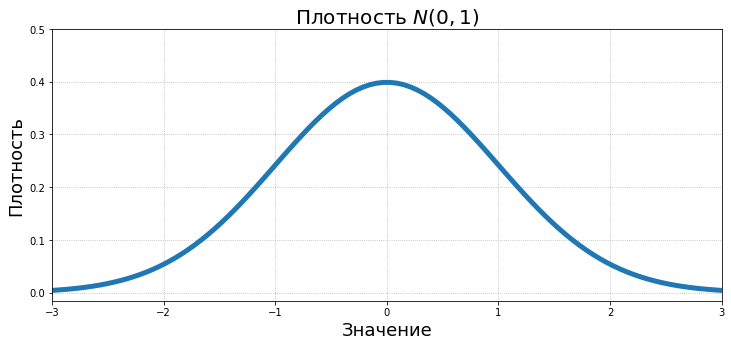

In [7]:
show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=0.5, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=1
)

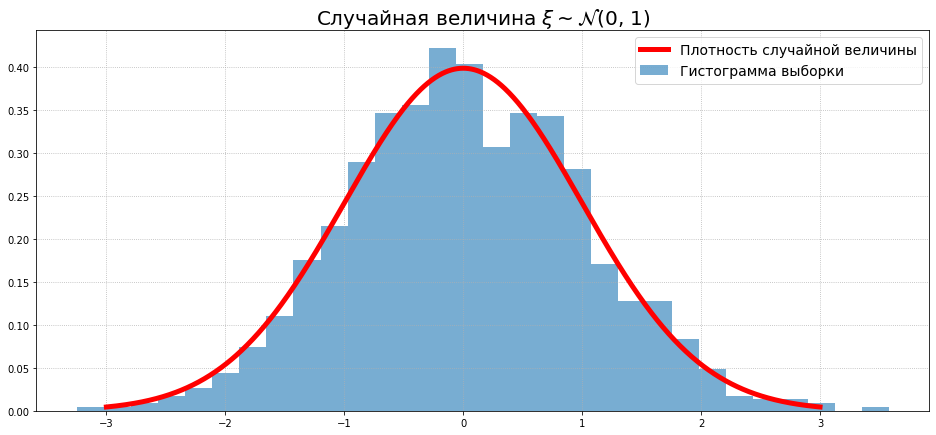

In [8]:
sample = sps.norm.rvs(size=1000)  # выборка размера 1000
grid = np.linspace(-3, 3, 1000)   # сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

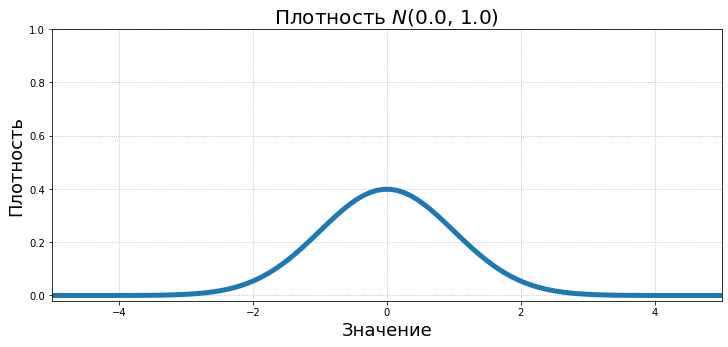

In [10]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
    pdf=widgets.fixed(sps.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
    loc = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
    scale = widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1),
    distr_name = r'$N$({loc}, {scale})'
)

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))

# отображаем вывод функции
display(ip.children[-1])
ip.update() # чтобы функция запустилась до первого изменения слайдеров

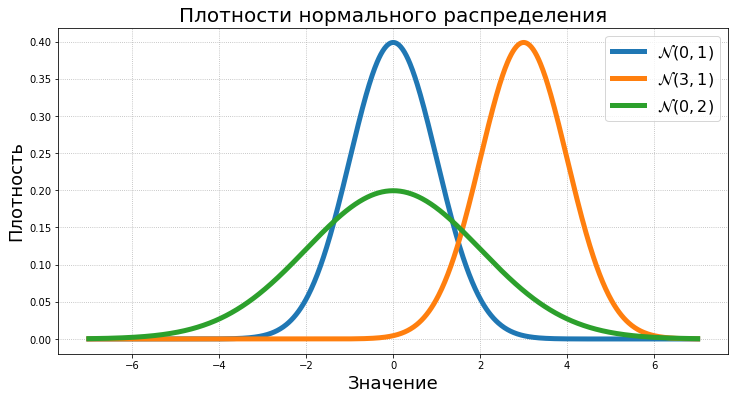

In [11]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
loc_values = [0, 3, 0]  # набор значений параметра a
sigma_values = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 6))

for i, (a, sigma) in enumerate(zip(loc_values, sigma_values)):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), lw=5, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))

plt.legend(fontsize=16)
plt.title('Плотности нормального распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.grid(ls=':')
plt.show()

mean var skew kurt =  0.3 0.21 0.8728715609439694 -1.2380952380952381


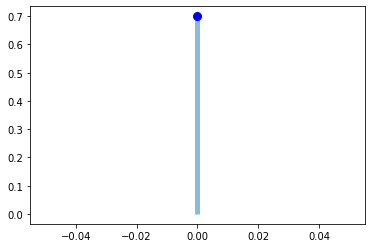

[0.]


In [25]:
from scipy.stats import bernoulli

p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print('mean var skew kurt = ', mean, var, skew, kurt)
fig, ax = plt.subplots(1, 1)

x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))

ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), lw=5, alpha=0.5)

plt.show()
print(x)

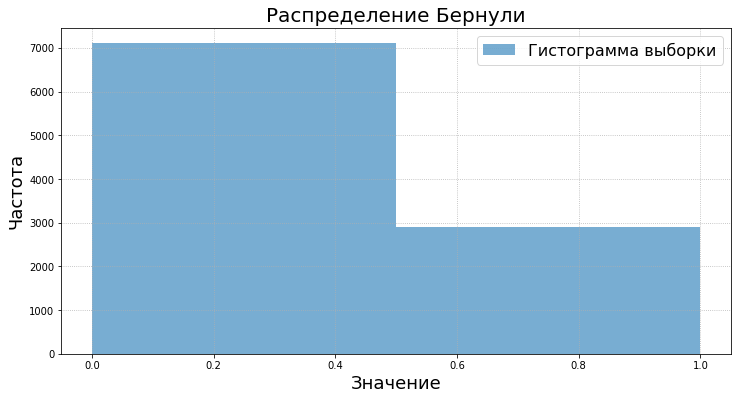

По бинам [7109. 2891.]


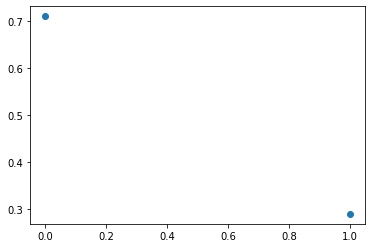

In [44]:
bernoulli_data = bernoulli.rvs(p=0.3, size=10000)

plt.figure(figsize=(12, 6))

'''
matplotlib.pyplot.hist(
    x, 
    bins=None, 
    range=None, 
    density=False, 
    weights=None, 
    cumulative=False, 
    bottom=None, 
    histtype='bar', 
    align='mid', 
    orientation='vertical', 
    rwidth=None, 
    log=False, 
    color=None, 
    label=None, 
    stacked=False, 
    *, data=None, **kwargs
)
'''

n, bins, patches = plt.hist(bernoulli_data, #bins=[0, 0.01, 0.99, 1], 
        bins = 2,
        density=False, 
        alpha=0.6, 
        label='Гистограмма выборки', histtype='bar') 
plt.legend(fontsize=16)
plt.title('Распределение Бернули', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Частота', fontsize=18)
plt.grid(ls=':')
plt.show()
print('По бинам', n)

# Нормировка на 1
n1 = n / n.sum()
nx = np.linspace(0, 1, 2)  # сетка для построения графика
plt.scatter(nx, n1)


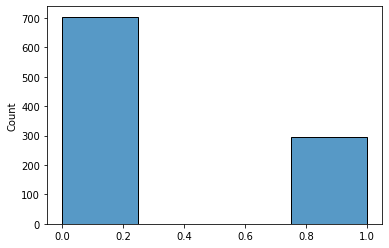

In [55]:
from scipy.stats import bernoulli

bernoulli_data = bernoulli.rvs(p, size=1000)

ax = sns.histplot(bernoulli_data, bins=4, kde=False)

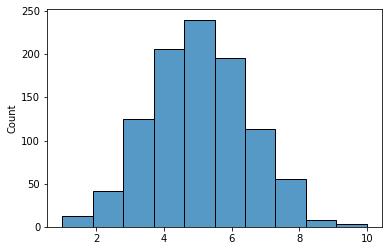

In [67]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import seaborn as sns

from scipy.stats import binom
binom_data = binom.rvs(n=10, p=0.5, size=1000)

#import cufflinks as cf
@interact
def hist_plot(nbins=10):
    ax = sns.histplot(binom_data, bins=nbins, common_norm=True, kde=False)

In [61]:
from scipy.stats import binom

n_values = [10]  # набор значений параметра n
p_values = [0.5]  # набор значений параметра p

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(mean, var, skew, kurt)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
x

5.0 2.5 0.0 -0.2


array([1., 2., 3., 4., 5., 6., 7., 8.])

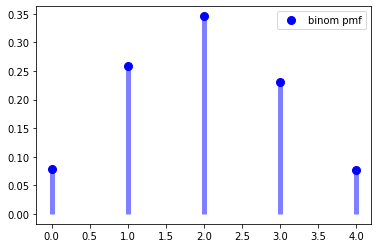

In [77]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# Display the probability mass function (pmf) - функция распределени
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot  (x,    binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.legend()

# Generate random numbers:
r = binom.rvs(n, p, size=1000)

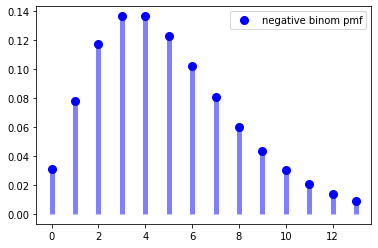

In [76]:
from scipy.stats import nbinom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 5, 0.5
mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')

x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='negative binom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.legend()

# Generate random numbers:
r = nbinom.rvs(n, p, size=1000)